In [1]:
## this is the copy from stacking kernel, I will try to do some feature engineering in this kernel intead of the model
##search
import os
import pandas as pd

In [24]:
train_path='/home/ubuntu/learn-with-other-kaggle/data/train.csv'
test_path='/home/ubuntu/learn-with-other-kaggle/data/test.csv'

train_data=pd.read_csv(train_path, index_col = 'Id')
test_data=pd.read_csv(test_path, index_col = 'Id')


train_data.head()

print(train_data.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, confusion_matrix
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

In [4]:
#get the unique value number for each column
train_data.nunique()

Elevation                             1665
Aspect                                 361
Slope                                   52
Horizontal_Distance_To_Hydrology       400
Vertical_Distance_To_Hydrology         423
Horizontal_Distance_To_Roadways       3250
Hillshade_9am                          176
Hillshade_Noon                         141
Hillshade_3pm                          247
Horizontal_Distance_To_Fire_Points    2710
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               1
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [5]:
test_data.nunique()

Elevation                             1974
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5826
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [6]:
# separate the features with the labels
features_train = train_data.drop('Cover_Type', axis=1)
label_train = train_data['Cover_Type']
features_test = test_data

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(features_train, label_train, test_size=0.1)

In [8]:
# random forest classifier

rfc = RandomForestClassifier(n_estimators = 100, random_state=0)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_valid)
mae = mean_absolute_error(y_valid, pred)

In [9]:
# check the predict min or max value
pred.min()

1

In [10]:
print(mae)

0.330026455026455


In [12]:
# check the importance for each feature
import eli5
from eli5.sklearn import PermutationImportance
perimp = PermutationImportance(rfc, random_state=0).fit(x_train,y_train)

In [13]:
eli5.show_weights(perimp, feature_names = x_train.columns.tolist(), top=100)

Weight,Feature
0.3419 ± 0.0066,Elevation
0.0881 ± 0.0032,Horizontal_Distance_To_Roadways
0.0448 ± 0.0029,Horizontal_Distance_To_Fire_Points
0.0381 ± 0.0022,Horizontal_Distance_To_Hydrology
0.0292 ± 0.0013,Wilderness_Area4
0.0224 ± 0.0011,Soil_Type10
0.0162 ± 0.0006,Soil_Type3
0.0143 ± 0.0015,Vertical_Distance_To_Hydrology
0.0107 ± 0.0009,Aspect
0.0107 ± 0.0009,Wilderness_Area1


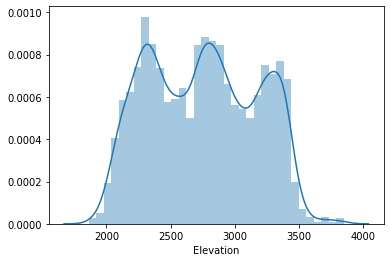

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(a=train_data['Elevation'])

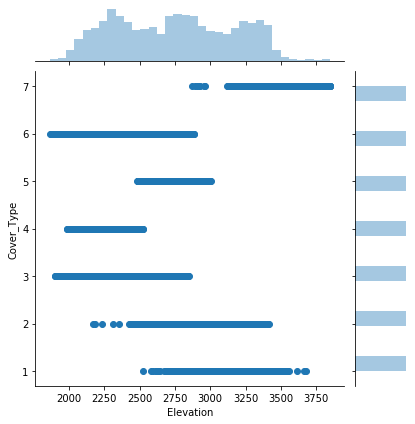

In [15]:
sns.jointplot(x=train_data['Elevation'], y=train_data['Cover_Type'])


KeyboardInterrupt: 

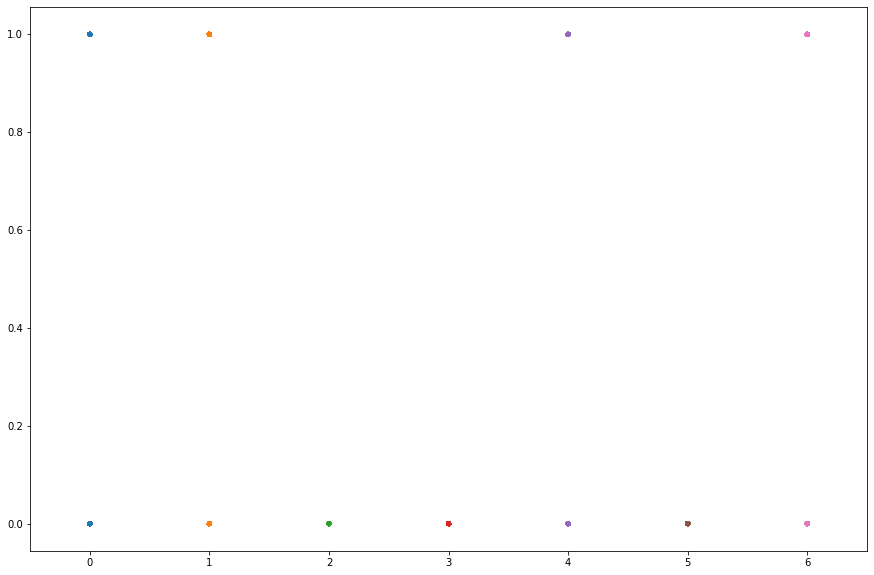

In [30]:
plt.figure(figsize=(15,10))
sns.swarmplot(y=train_data['Wilderness_Area1'],x=train_data['Cover_Type'])


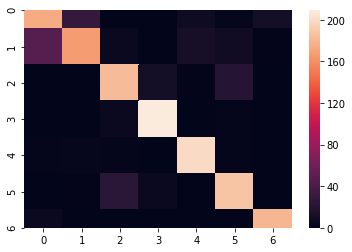

In [19]:
sns.heatmap(confusion_matrix(y_valid, pred))

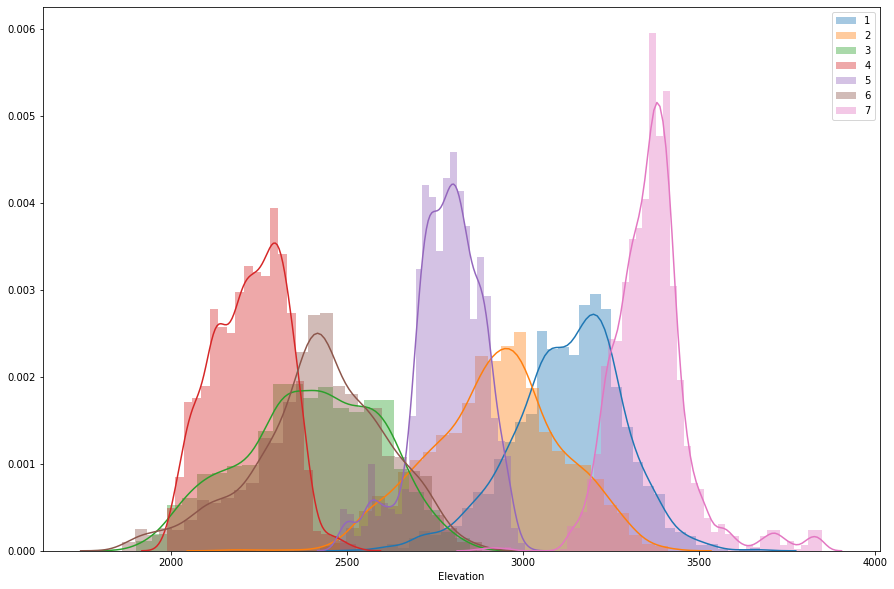

In [17]:
plt.figure(figsize=(15,10))
for i in range(1,8):
    sns.distplot(a=train_data[train_data['Cover_Type']==i]['Elevation'], label=i)
plt.legend()

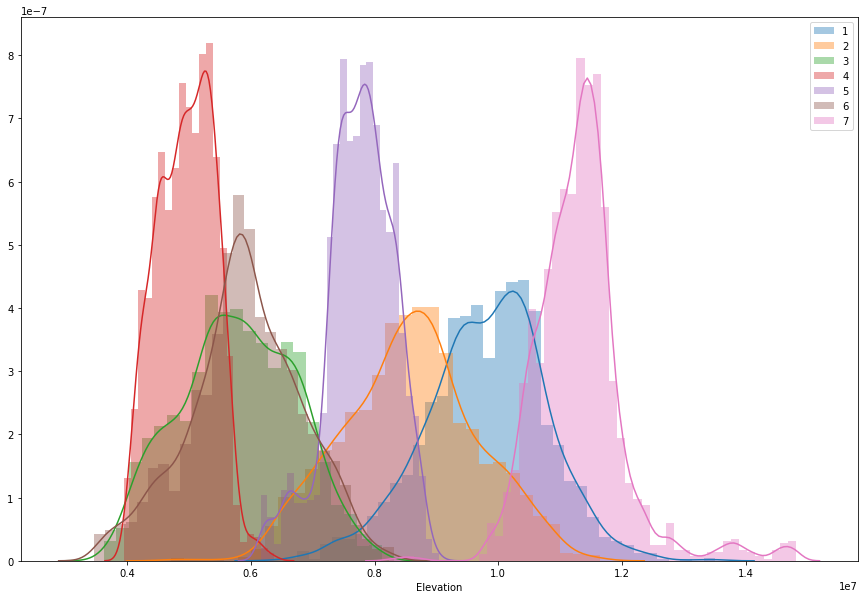

In [40]:
plt.figure(figsize=(15,10))
#squere_data=train_data[train_data['Cover_Type']==1]['Elevation']**2
#print(squere_data)
for i in range(1,8):
    squere_data=train_data[train_data['Cover_Type']==i]['Elevation']**2
    sns.distplot(a=squere_data, label=i)
plt.legend()

In [21]:
# baesd on above map, we can see the 1 and 2 will be mixed 3 and 6 are mixed, mainly because their Elevation are
# highly overlapped

In [ ]:
# plot the first 9 features for the data 
fig, ax =plt.subplots(3,3,figsize=(20,10))
feature_list =test_data.columns
for feature_index in range(0,9):
    for i in (1,2,3,6):
        x_fig= int(feature_index/3)
        y_fig = feature_index%3
        sns.distplot(a=train_data[train_data['Cover_Type']==i][feature_list[feature_index]], label=i, ax=ax[x_fig][y_fig])

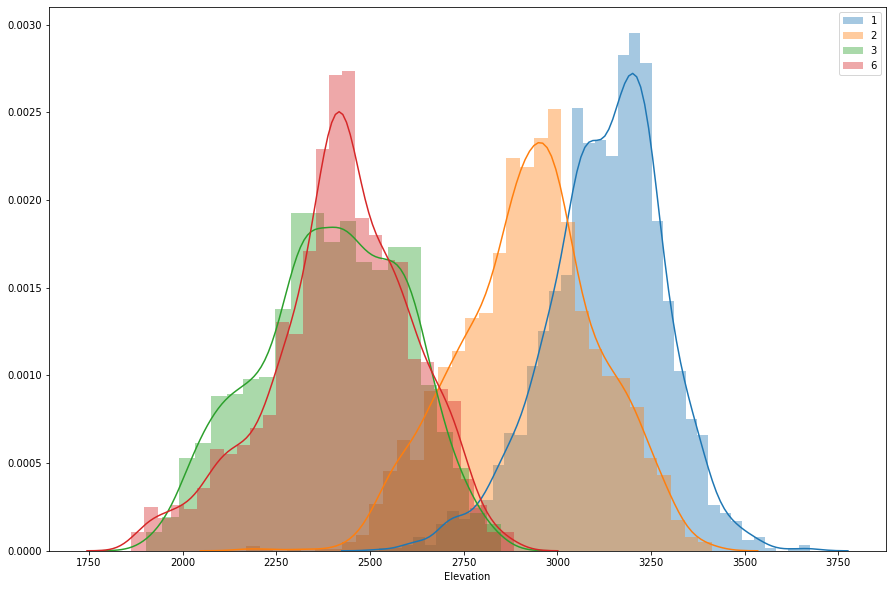

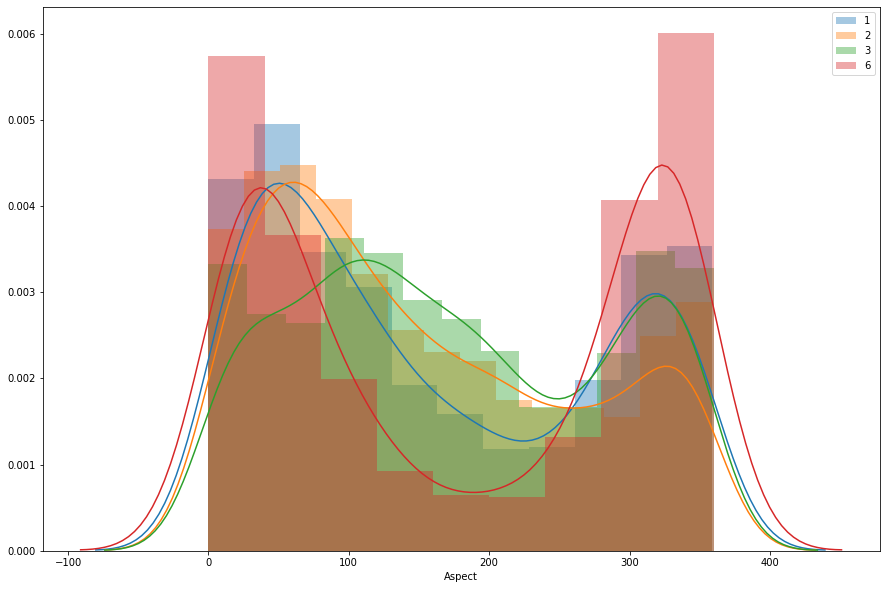

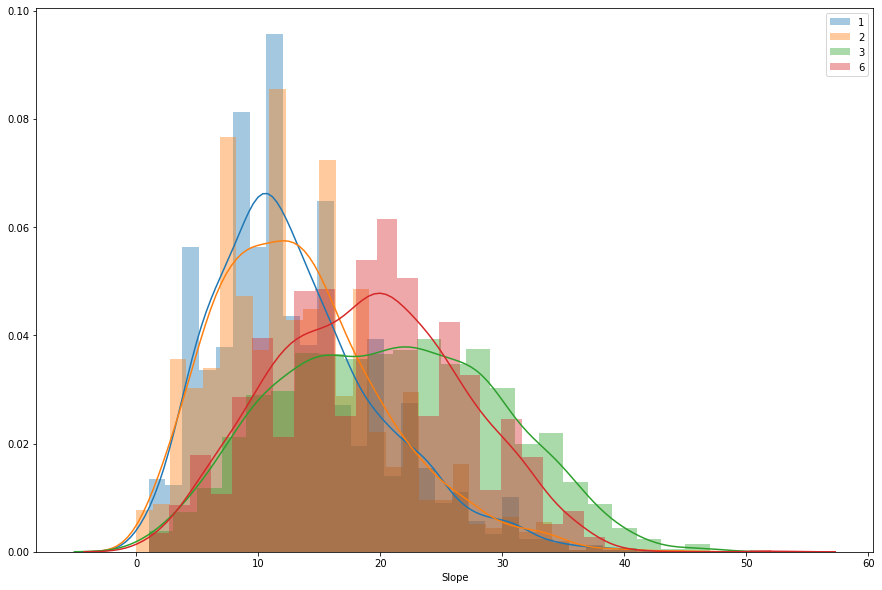

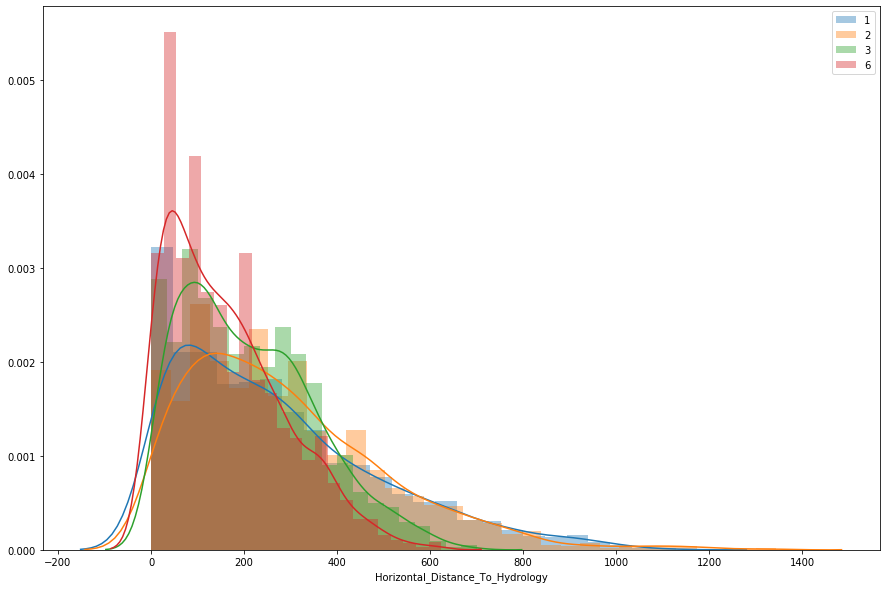

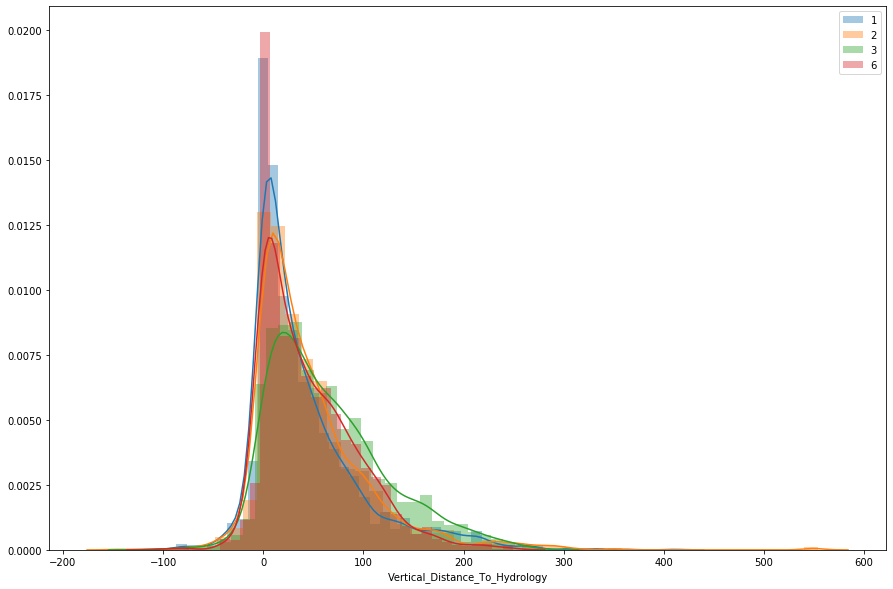

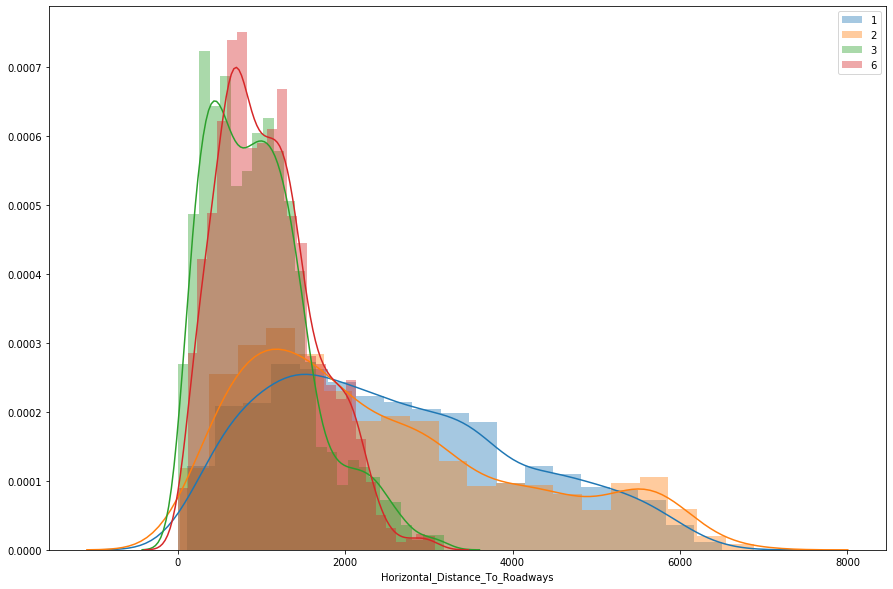

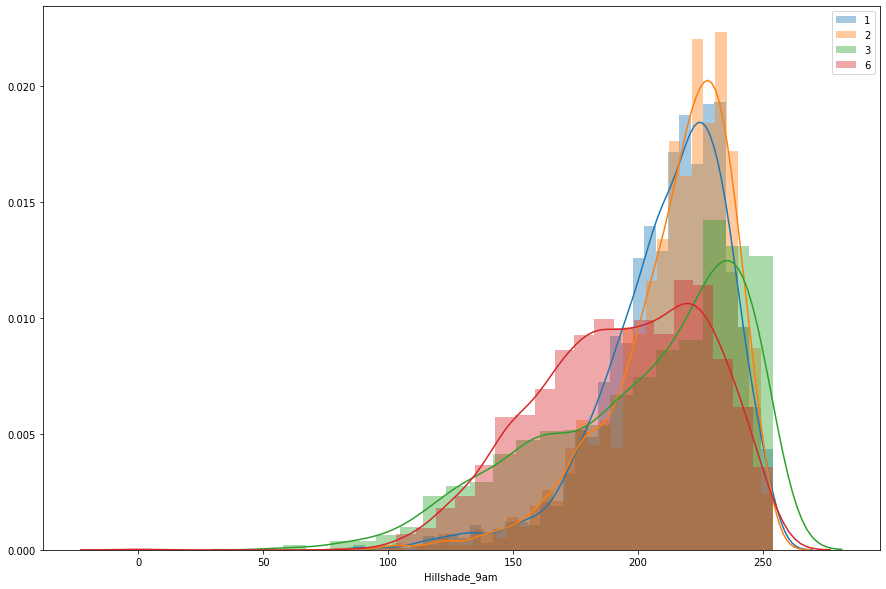

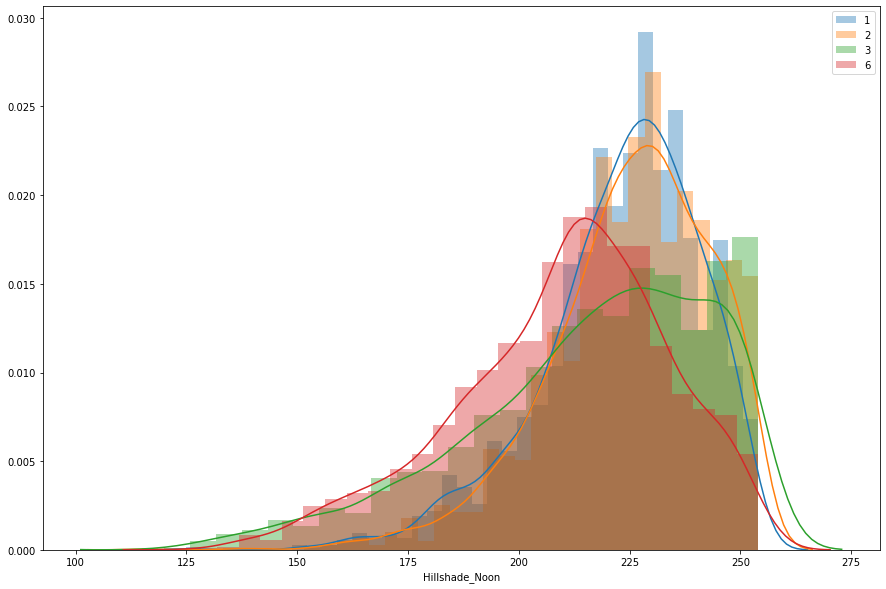

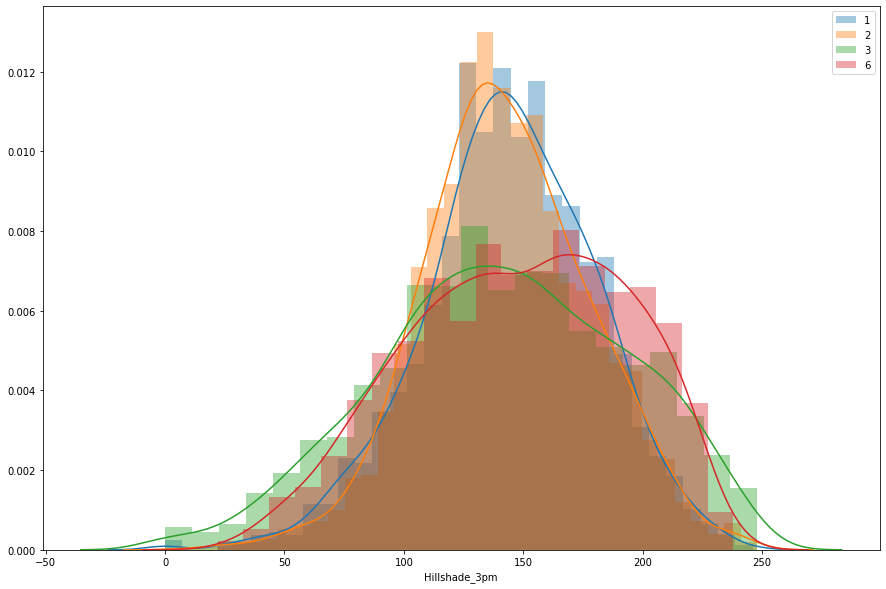

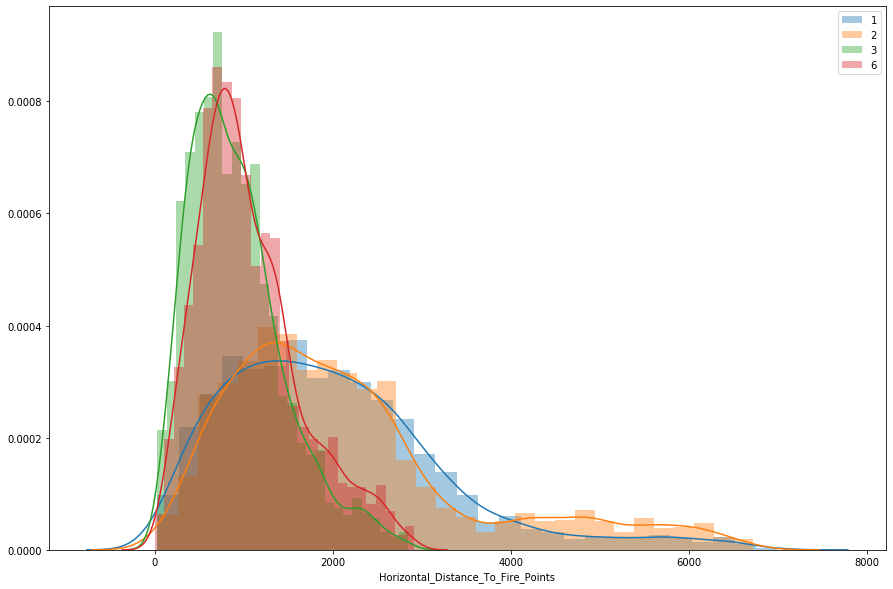

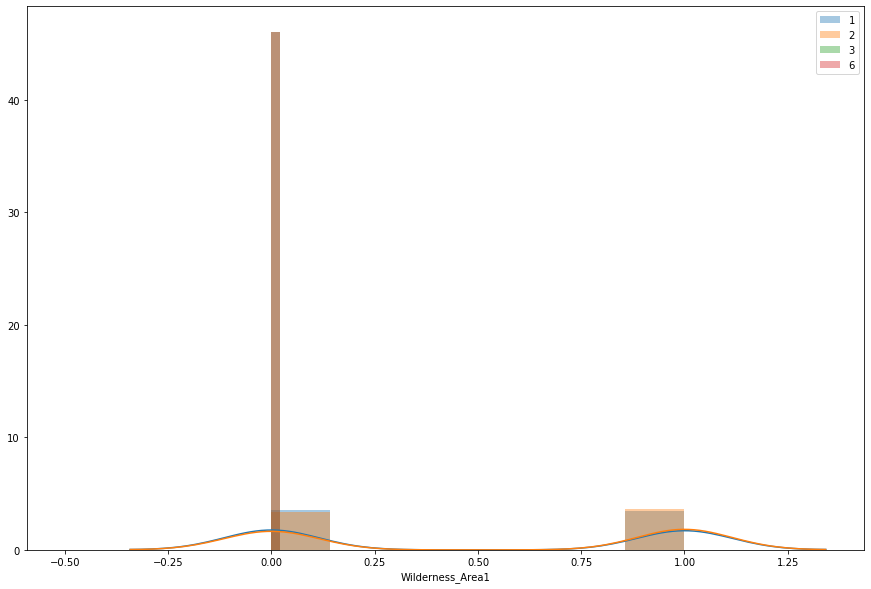

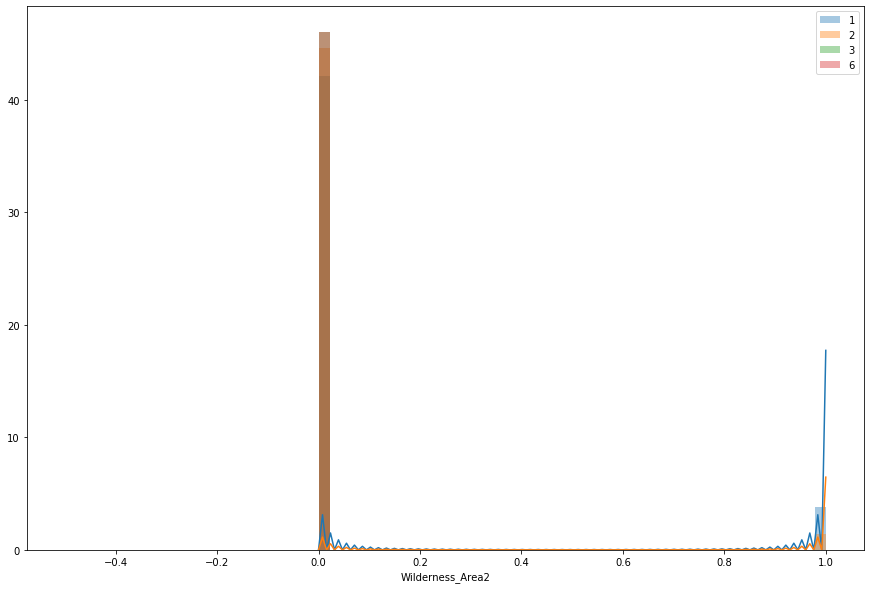

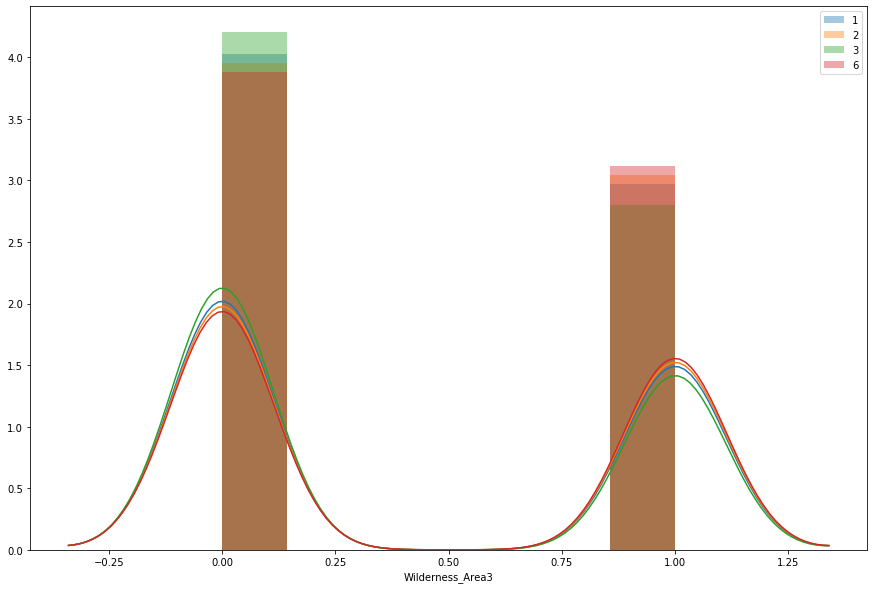

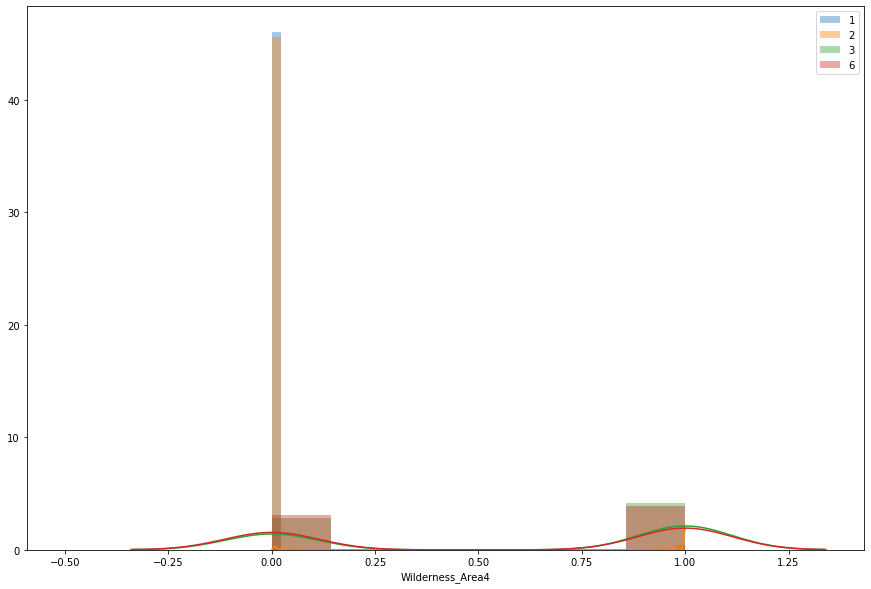

In [28]:
# plot the all the features for the data 
feature_list =test_data.columns
figure_size = len(feature_list)

for feature_index in range(0,14):
    fig, ax =plt.subplots(1,1,figsize=(15,10))
    for i in (1,2,3,6):
        sns.distplot(a=train_data[train_data['Cover_Type']==i][feature_list[feature_index]], label=i)
    plt.legend()

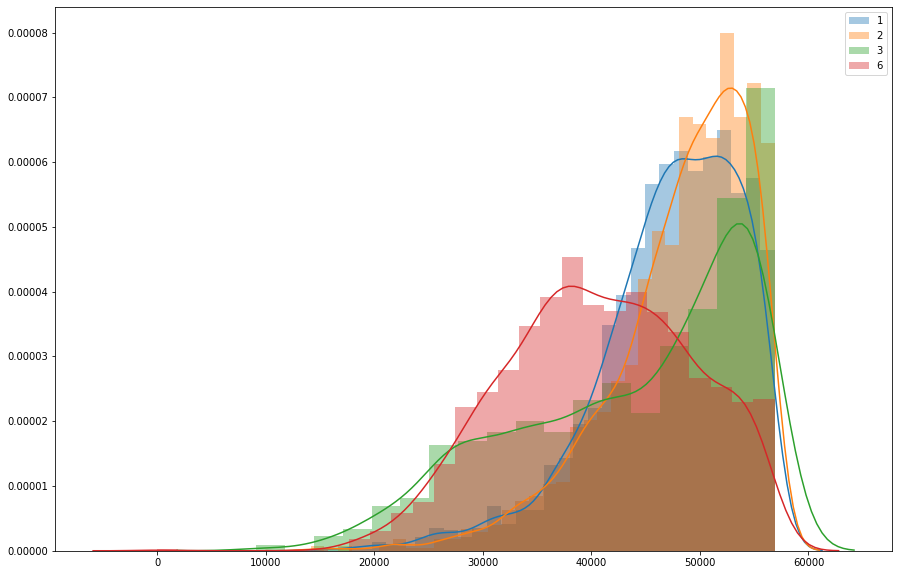

In [46]:
plt.figure(figsize=(15,10))
for i in (1,2,3,6):
    data = (train_data[train_data['Cover_Type']==i]['Hillshade_9am']*train_data[train_data['Cover_Type']==i]['Hillshade_Noon'])
    sns.distplot(a=data, label=i)
plt.legend()

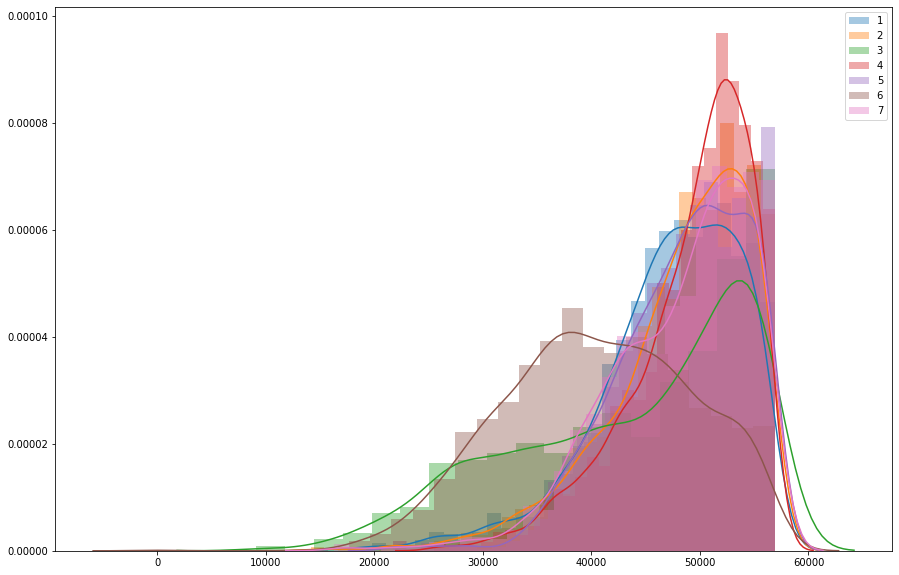

In [47]:
plt.figure(figsize=(15,10))
for i in range(1,8):
    data = (train_data[train_data['Cover_Type']==i]['Hillshade_9am']*train_data[train_data['Cover_Type']==i]['Hillshade_Noon'])
    sns.distplot(a=data, label=i)
plt.legend()

In [71]:
features_train['Hillshade_Acc'] = features_train['Hillshade_9am']*features_train['Hillshade_Noon']

#features_train.drop('Hillshade_Acc',axis=1, inplace=True)

In [72]:
x_train, x_valid, y_train, y_valid = train_test_split(features_train, label_train, test_size=0.1,random_state=0)

# random forest classifier

print(x_train.shape)
print(x_valid.shape)
rfc_new = RandomForestClassifier(n_estimators = 100, random_state=0)
rfc_new.fit(x_train,y_train)
pred=rfc_new.predict(x_valid)
mae = mean_absolute_error(y_valid, pred)
print(mae)

(13608, 55)
(1512, 55)
0.3498677248677249


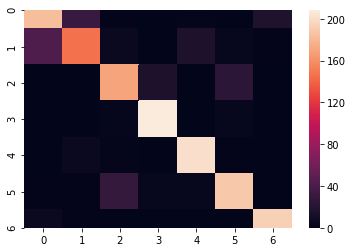

In [67]:
sns.heatmap(confusion_matrix(y_valid, pred))

In [73]:
perimp = PermutationImportance(rfc_new, random_state=0).fit(x_train,y_train)
eli5.show_weights(perimp, feature_names = x_train.columns.tolist(), top=100)

Weight,Feature
0.3038 ± 0.0086,Elevation
0.0762 ± 0.0013,Horizontal_Distance_To_Roadways
0.0385 ± 0.0011,Horizontal_Distance_To_Hydrology
0.0357 ± 0.0024,Horizontal_Distance_To_Fire_Points
0.0132 ± 0.0011,Soil_Type10
0.0119 ± 0.0007,Soil_Type3
0.0110 ± 0.0009,Vertical_Distance_To_Hydrology
0.0106 ± 0.0014,Hillshade_Acc
0.0097 ± 0.0011,Wilderness_Area4
0.0063 ± 0.0006,Soil_Type39


In [74]:
# try to normalize the data but on effect on the result.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(features_train) 
features_train.loc[:,:] = scaled_values

In [75]:
features_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Hillshade_Acc
Id,,,,,,,,,,,,,,,,,,,,,
1,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,0.897898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.901375
2,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,0.890176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.908899
3,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355,0.875304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979079
4,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935,0.888174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995816
5,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839,0.882597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.905031


In [76]:

x_train, x_valid, y_train, y_valid = train_test_split(features_train, label_train, test_size=0.1,random_state=0)

# random forest classifier

print(x_train.shape)
print(x_valid.shape)
rfc_new = RandomForestClassifier(n_estimators = 100, random_state=0)
rfc_new.fit(x_train,y_train)
pred=rfc_new.predict(x_valid)
mae = mean_absolute_error(y_valid, pred)
print(mae)

(13608, 55)
(1512, 55)
0.3498677248677249


In [ ]:
perimp = PermutationImportance(rfc_new, random_state=0).fit(x_train,y_train)
eli5.show_weights(perimp, feature_names = x_train.columns.tolist(), top=100)

In [83]:
#is that possible to manage the separate others and 3,6 and then further separate 3, and 6?
features_train_without_acc = features_train.drop('Hillshade_Acc',axis=1)
x_train, x_valid, y_train, y_valid = train_test_split(features_train, label_train, test_size=0.1,random_state=0)
print(x_train.shape)
print(x_valid.shape)
rfc_new = RandomForestClassifier(n_estimators = 300, random_state=0)
rfc_new.fit(x_train,y_train)
pred=rfc_new.predict(x_valid)
mae = mean_absolute_error(y_valid, pred)
print(mae)

(13608, 55)
(1512, 55)
0.3697089947089947


[4 4 4 ... 6 4 6]
